In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from ctapipe.io.lsteventsource import LSTEventSource
from ctapipe.io import EventSeeker
from ctapipe.calib.camera import DragonPedestal

In [41]:
def get_first_capacitor(event, nr):
    hg = 0
    lg = 1
    fc = np.zeros((2, 8))
    first_cap = event.lst.tel[0].evt.first_capacitor_id[nr * 8:(nr + 1) * 8]
    for channel_hg in [0, 2, 4, 6]:
        fc[hg, channel_hg] = first_cap[channel_hg]
        fc[hg, channel_hg + 1] = first_cap[channel_hg]
    for channel_lg in [1, 3, 5, 7]:
        fc[lg, channel_lg - 1] = first_cap[channel_lg]
        fc[lg, channel_lg] = first_cap[channel_lg]
    return fc


def remove_pedestal(event, pedestal, nr):
    first_cap = get_first_capacitor(event, nr)
    n_pixels = 7
    size4drs = 4 * 1024
    roisize = 40
    waveform = event.r0.tel[0].waveform[:, nr * 7:(nr + 1) * 7, :]
    data = np.zeros((2, 7, 40))
    for i in range(0, 2):
        for j in range(0, n_pixels):
            for k in range(0, roisize):
                position = int((k + first_cap[i, j])%size4drs)
                val = waveform[i, j, k] - int(pedestal.meanped[i, j, position])
                data[i, j, k] = val
    return data
            

In [3]:
path_to_data = os.path.join("/home", "pawel1", "Pulpit", "Astrophysics", "CTA", "dragon",
                            "data", "dane_lst", "20180705", "Date20180705.0000.fits.fz")
reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)

ped = DragonPedestal()
for i in range(0, 3500):
    ev = seeker[i]
    ped.fill_pedestal_event(ev, 1)

ped.finalize_pedestal()

In [5]:
ped.meanped

array([[[298.87878788, 237.45454545, 298.30952381, ..., 307.18181818,
         323.42424242, 273.96969697],
        [308.81818182, 269.        , 316.85714286, ..., 333.93939394,
         322.93939394, 275.18181818],
        [204.24242424, 222.13157895, 206.61764706, ..., 290.33333333,
         262.84848485, 235.3030303 ],
        ...,
        [277.12121212, 249.36363636, 229.89473684, ..., 285.78787879,
         294.45454545, 304.78787879],
        [265.51515152, 260.48484848, 244.26315789, ..., 268.63636364,
         293.21212121, 292.06060606],
        [258.84848485, 239.84848485, 214.66666667, ..., 253.52941176,
         244.        , 246.93939394]],

       [[249.33333333, 230.3030303 , 237.09090909, ..., 277.42424242,
         291.15151515, 262.93939394],
        [263.33333333, 207.06060606, 217.18181818, ..., 270.84848485,
         288.66666667, 269.15151515],
        [111.51515152, 115.90909091, 117.67647059, ..., 159.18181818,
         152.15151515, 130.03030303],
        ...,


/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


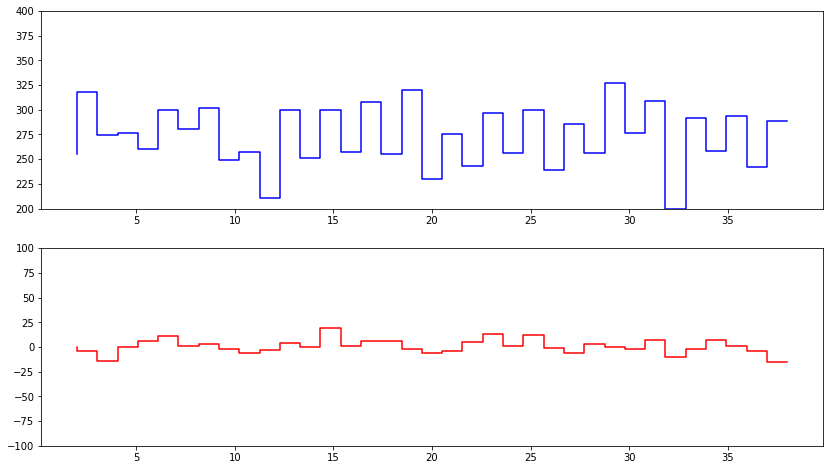

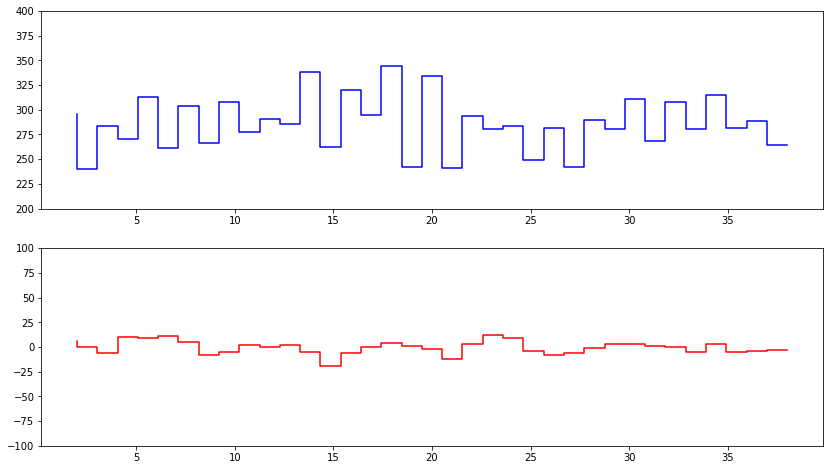

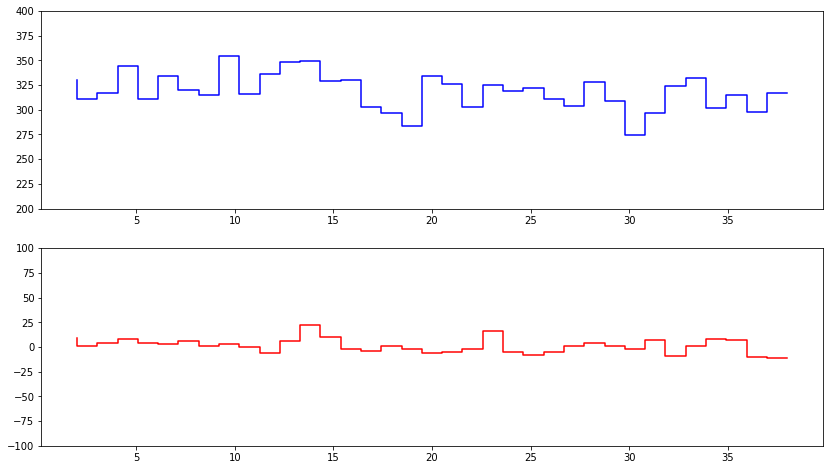

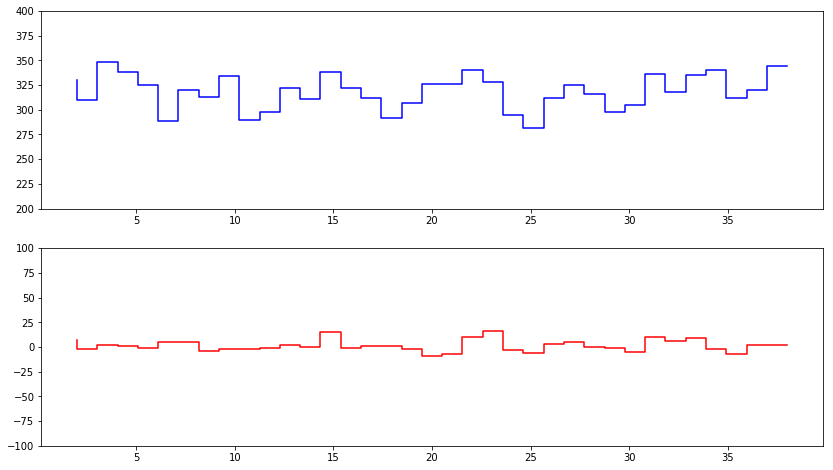

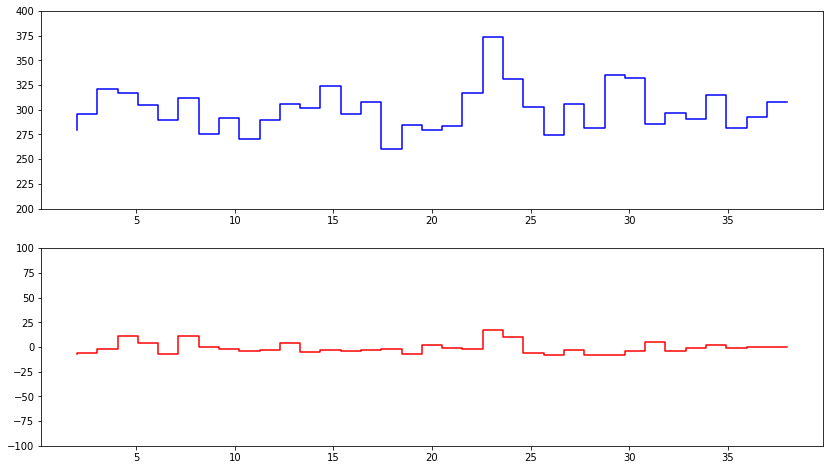

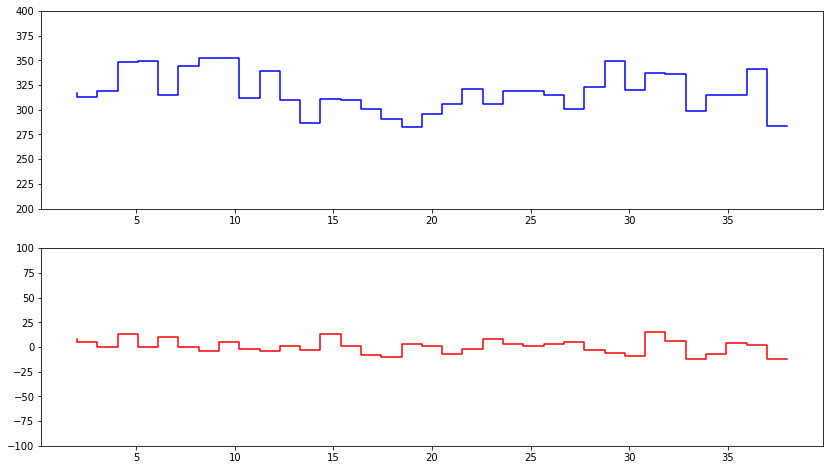

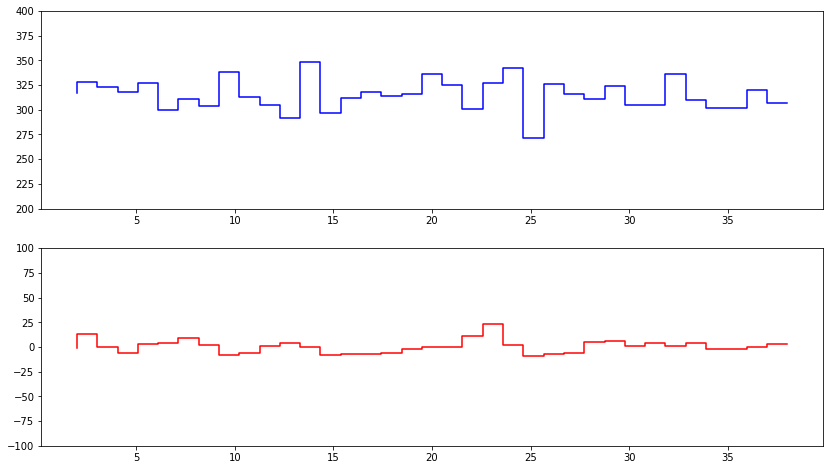

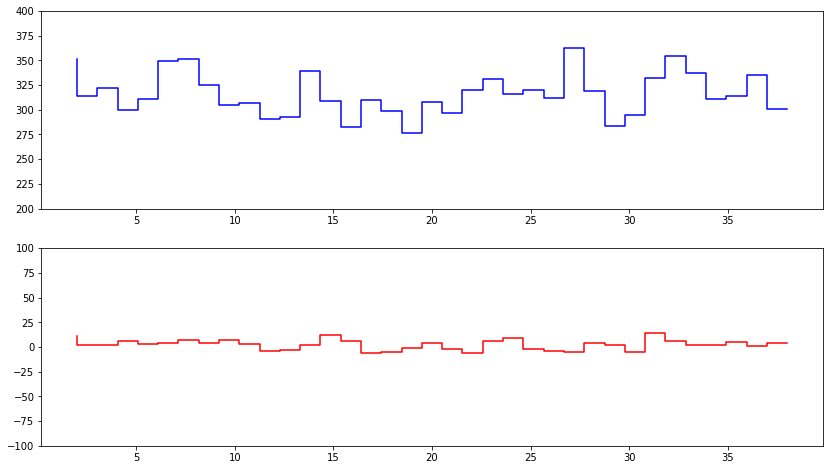

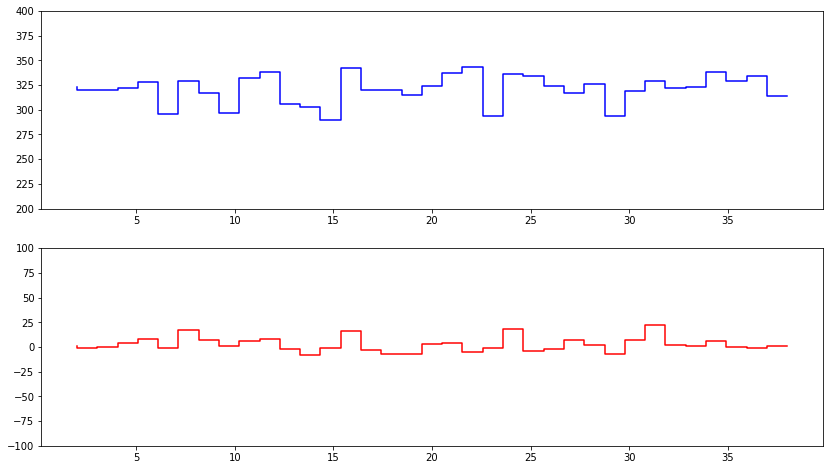

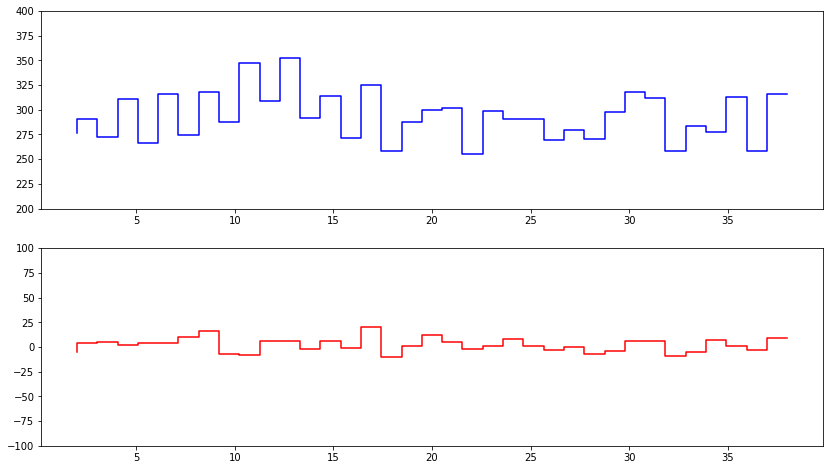

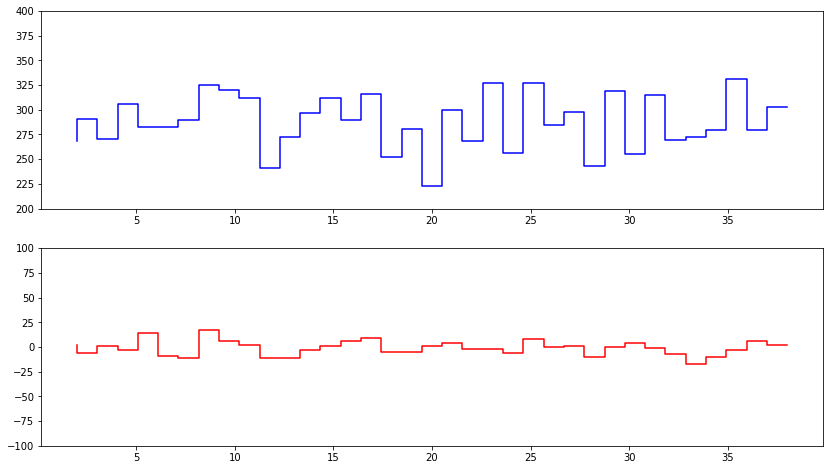

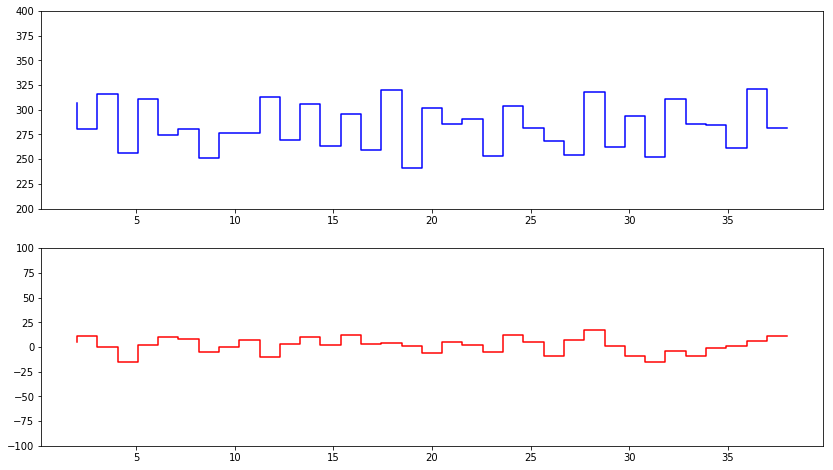

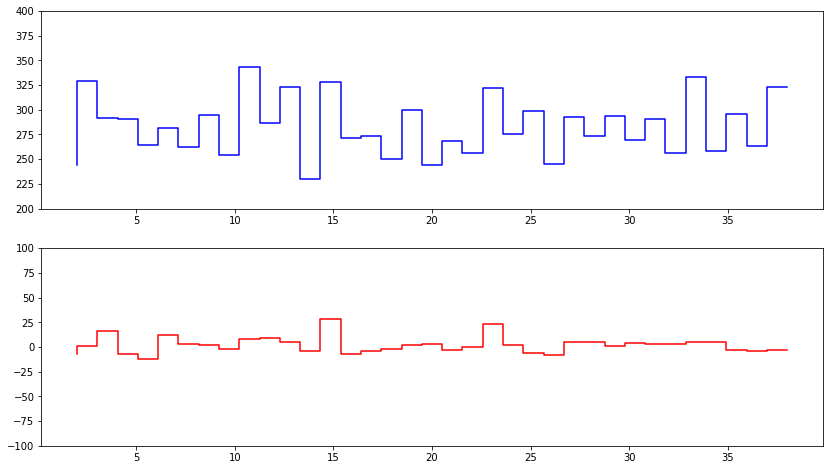

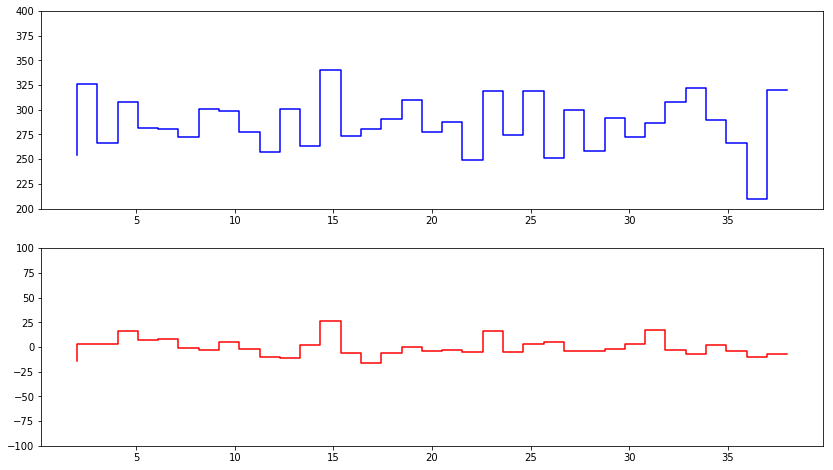

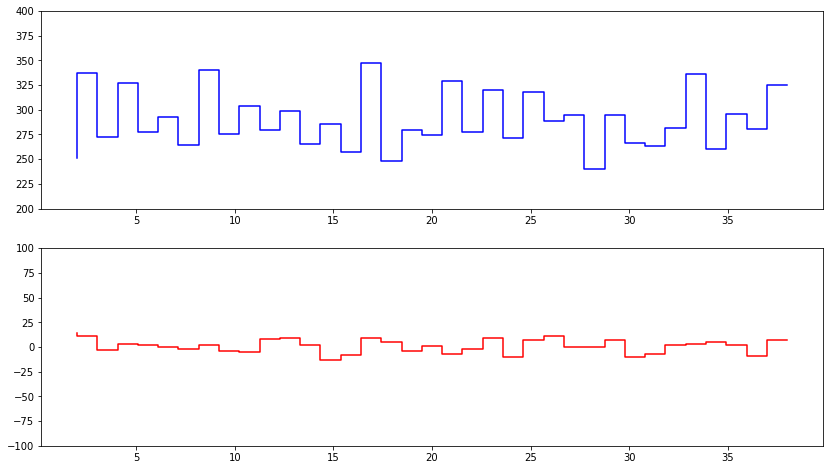

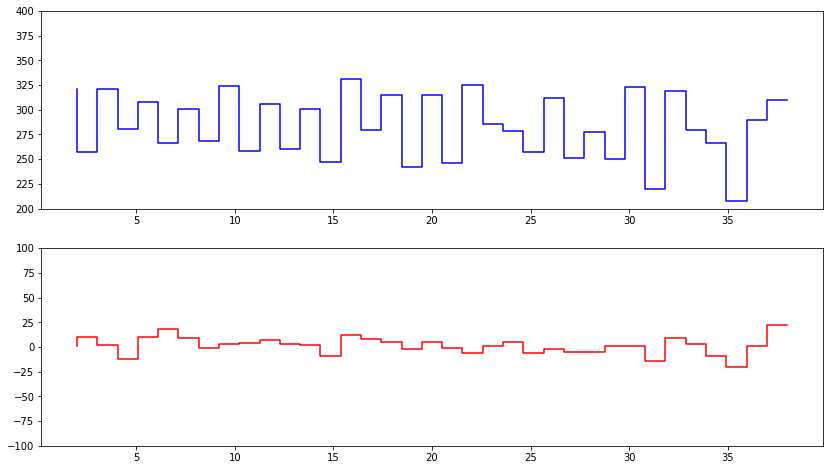

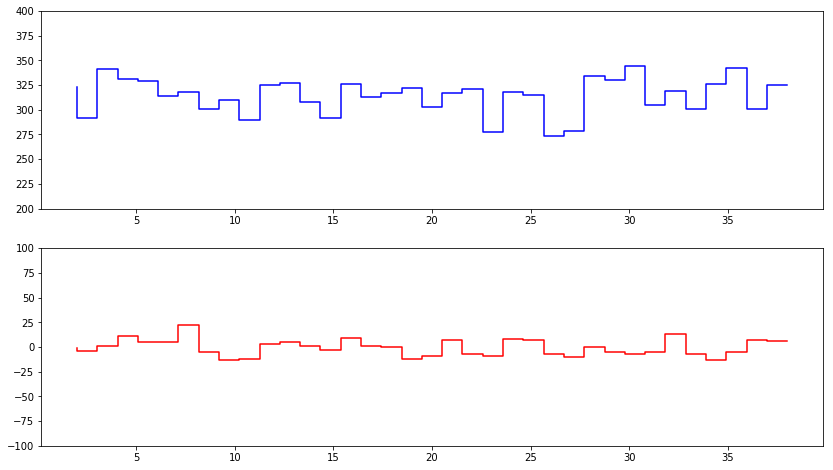

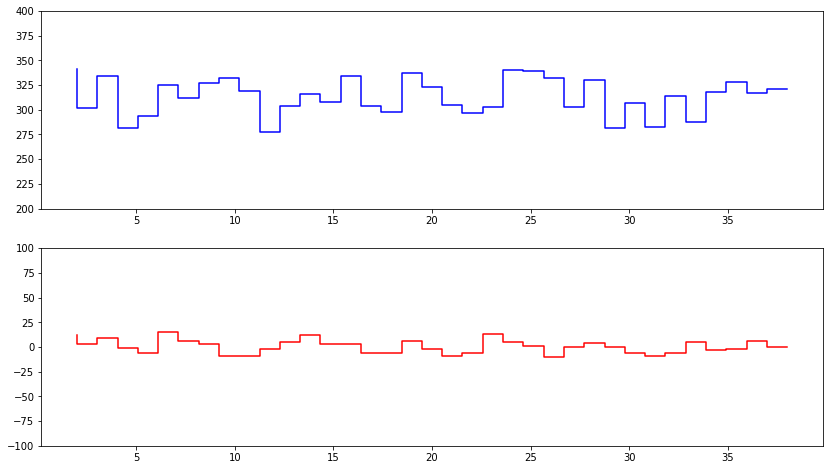

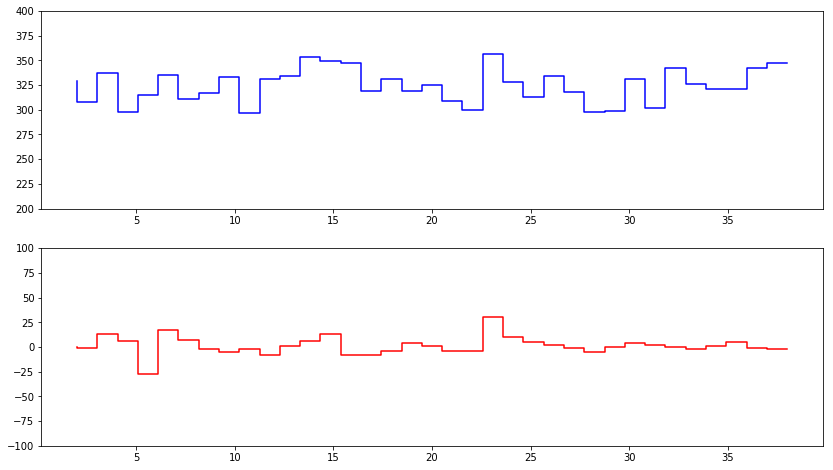

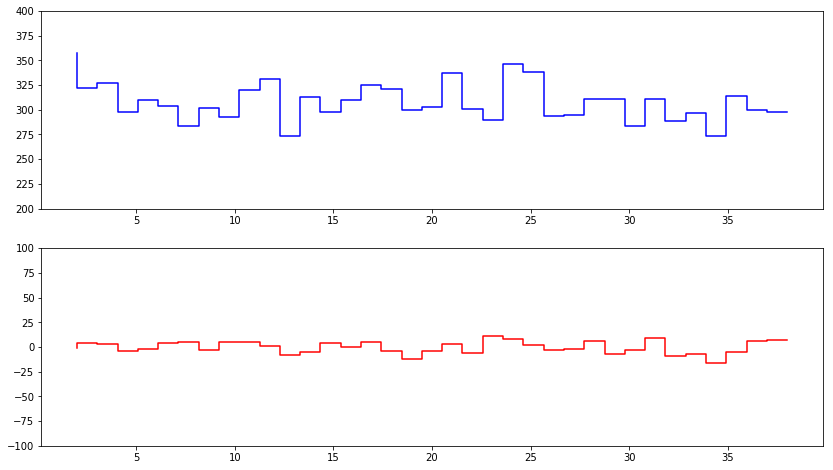

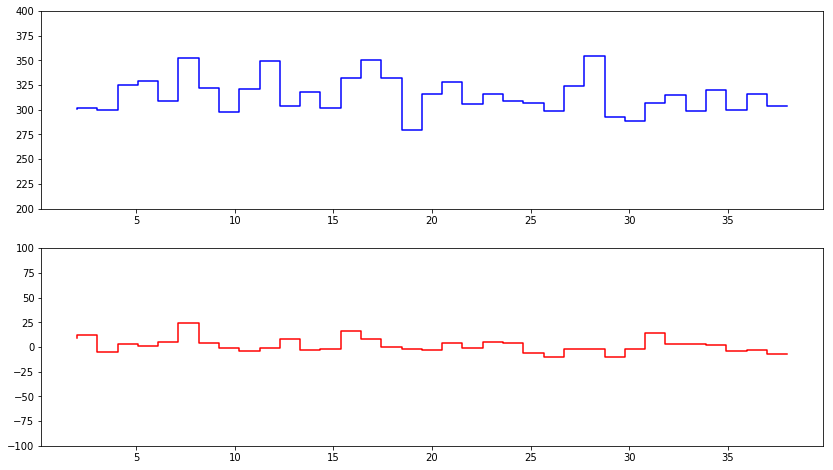

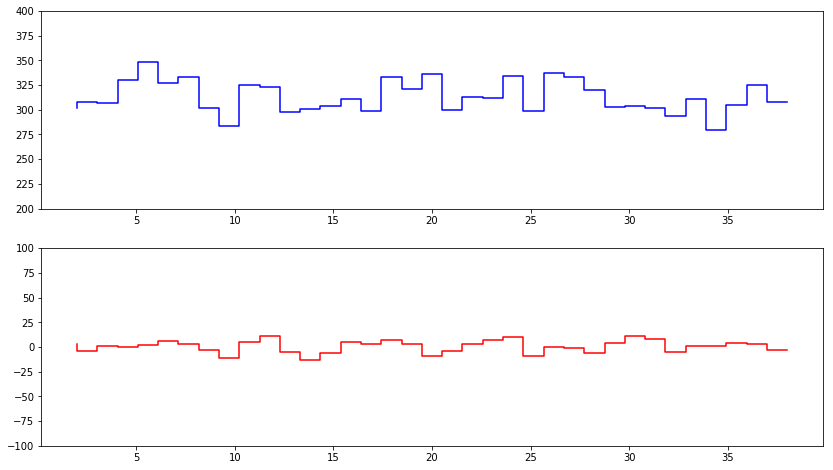

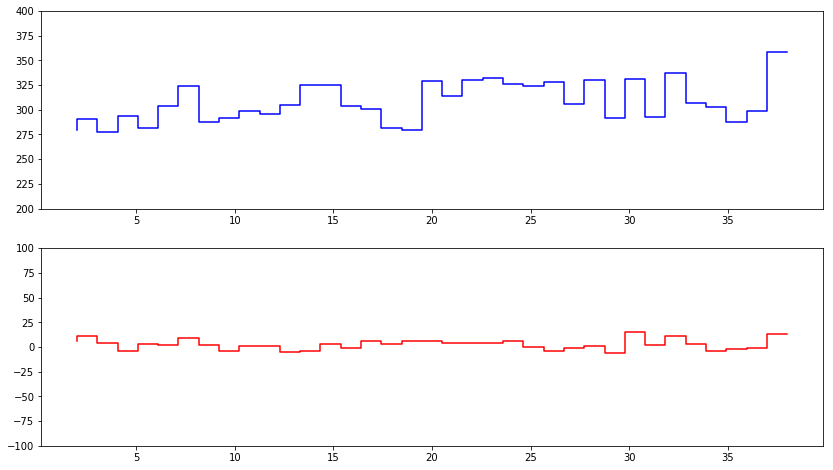

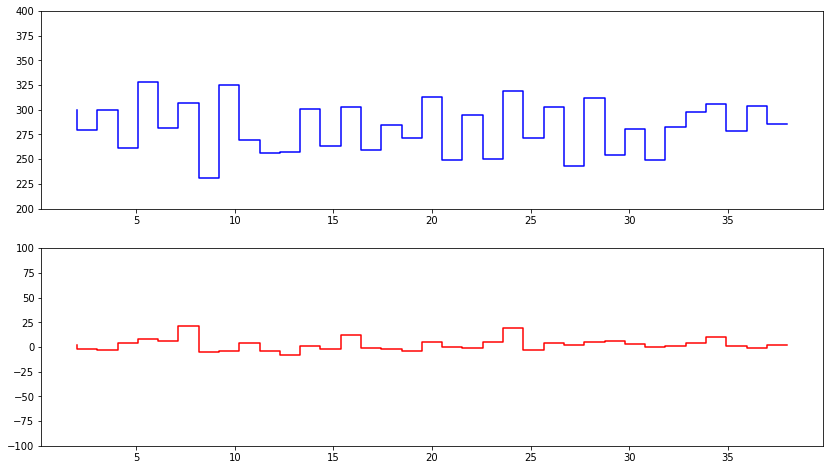

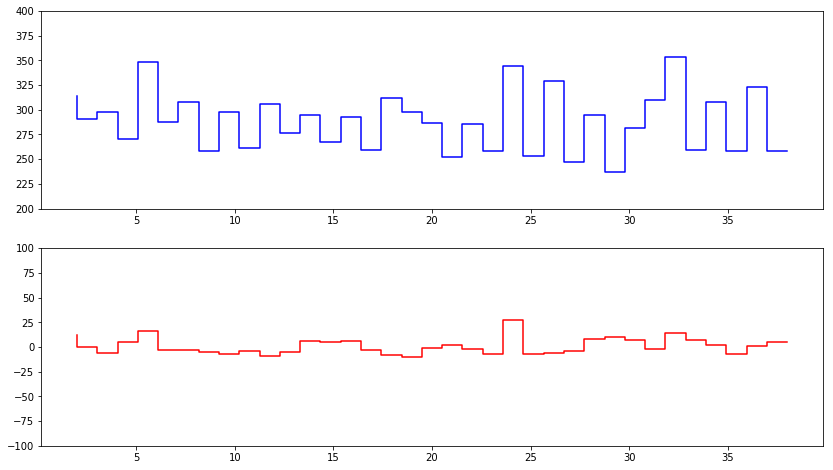

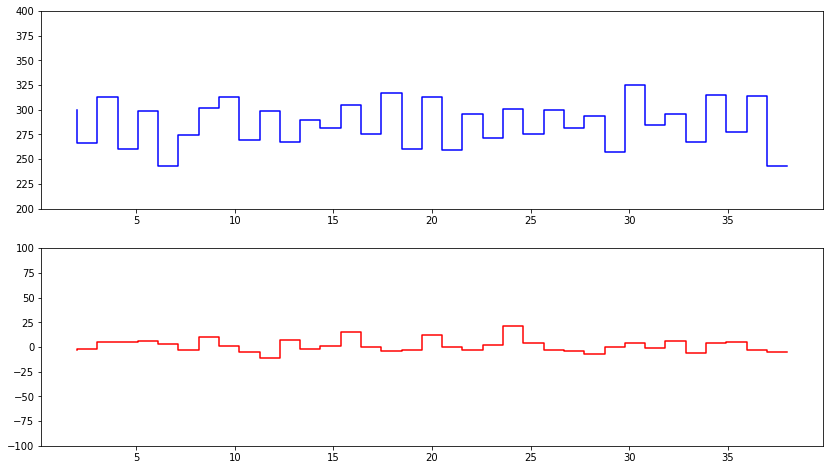

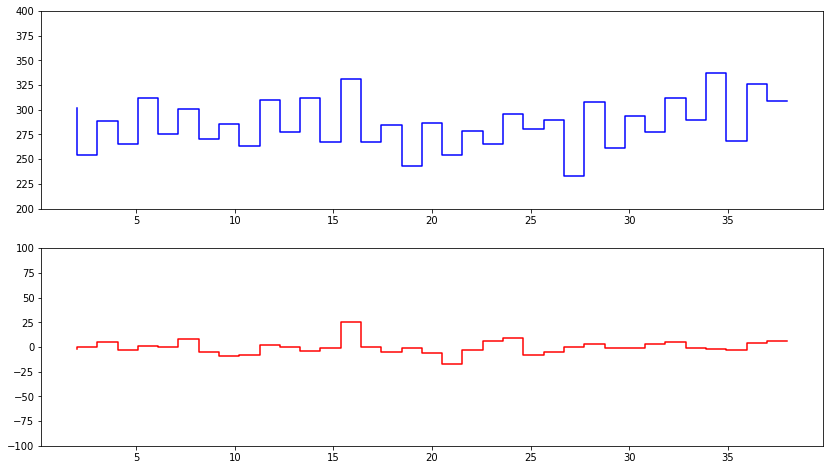

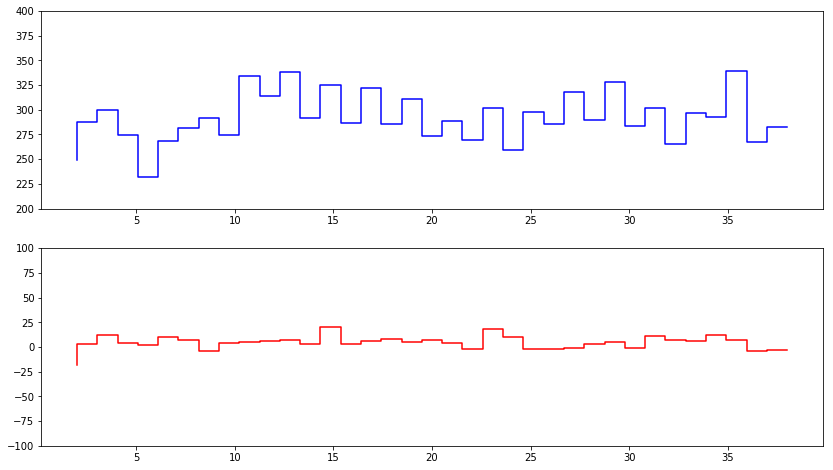

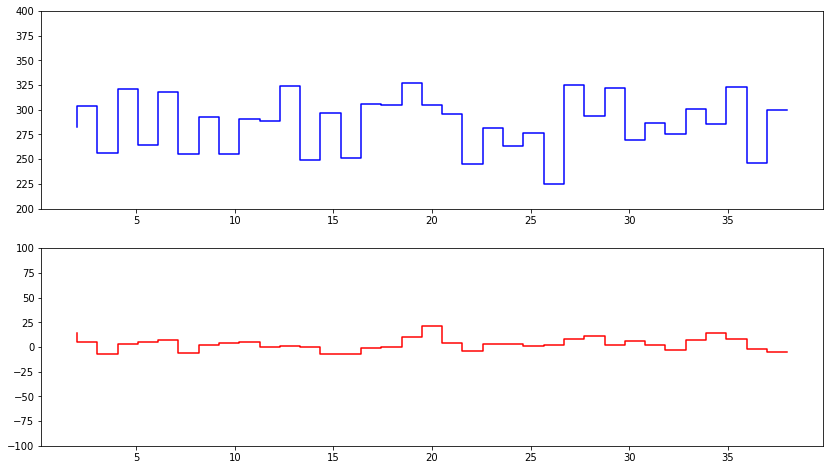

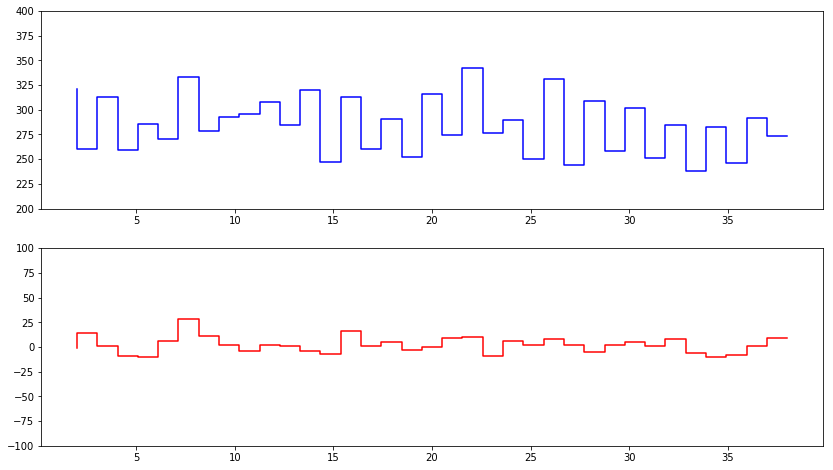

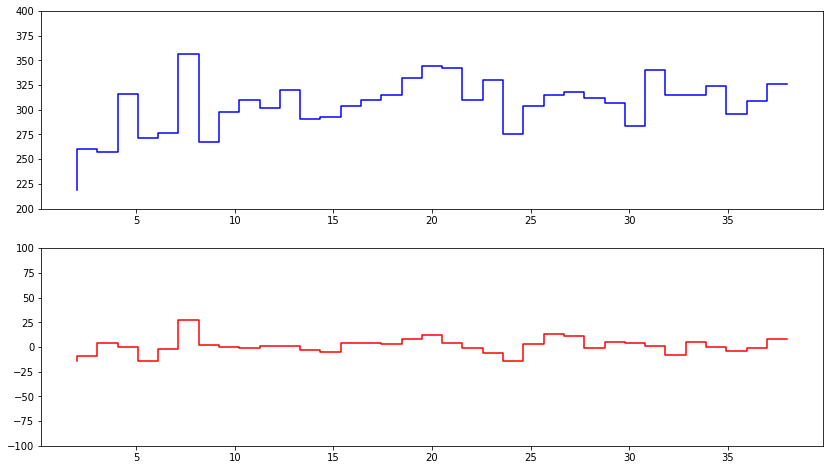

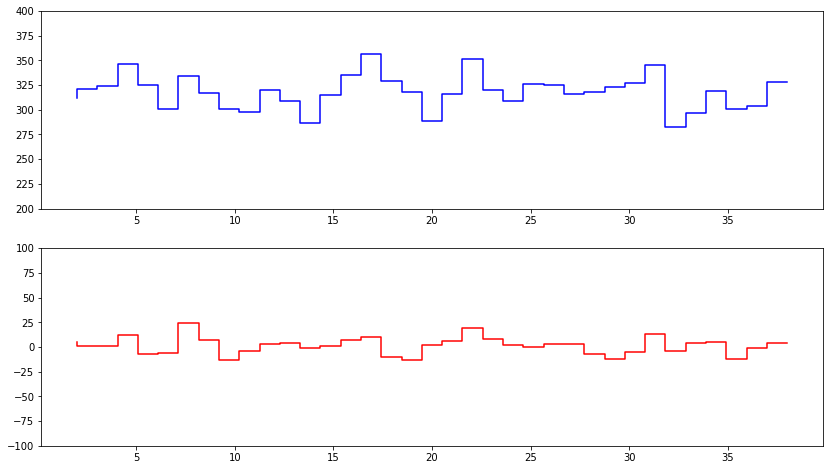

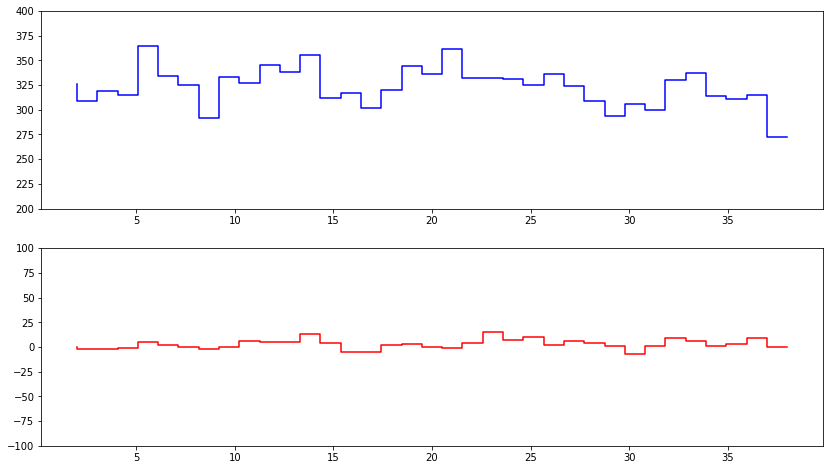

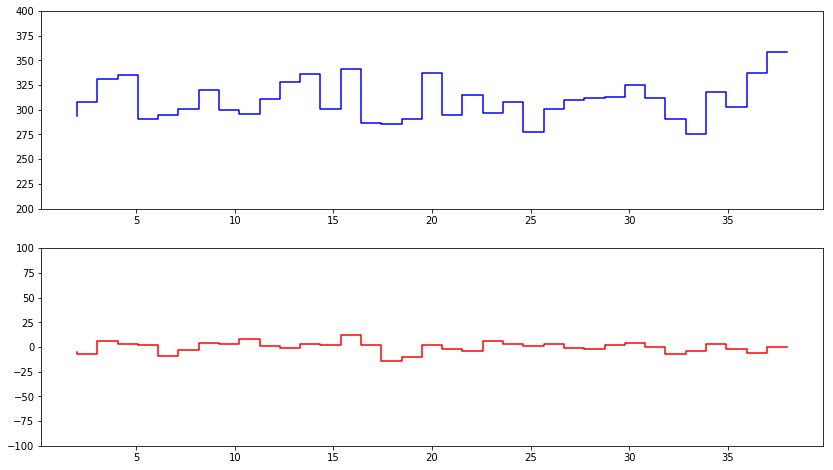

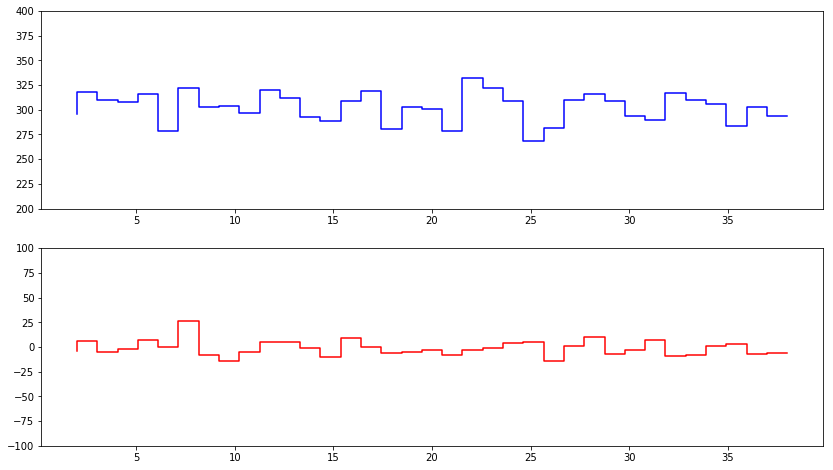

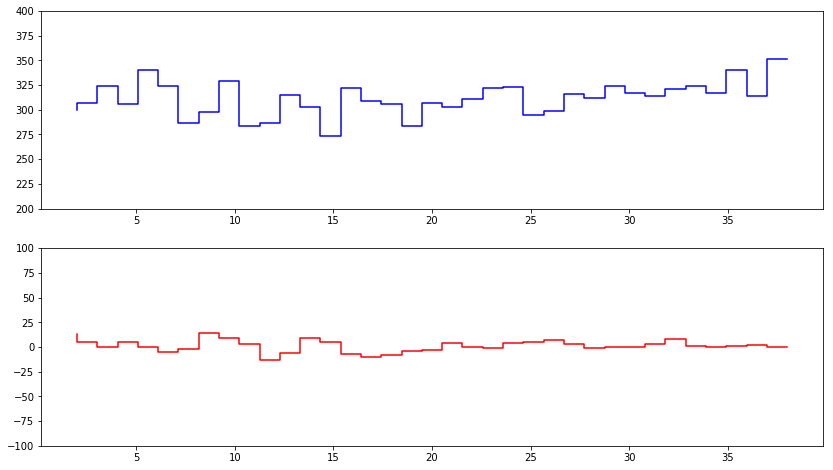

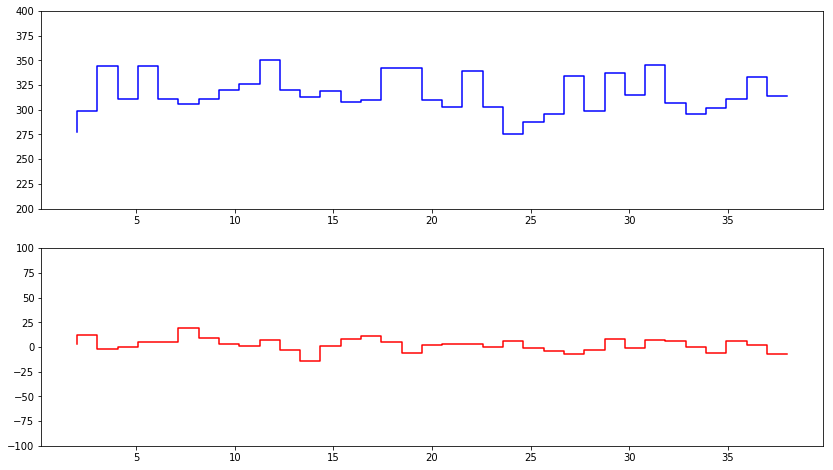

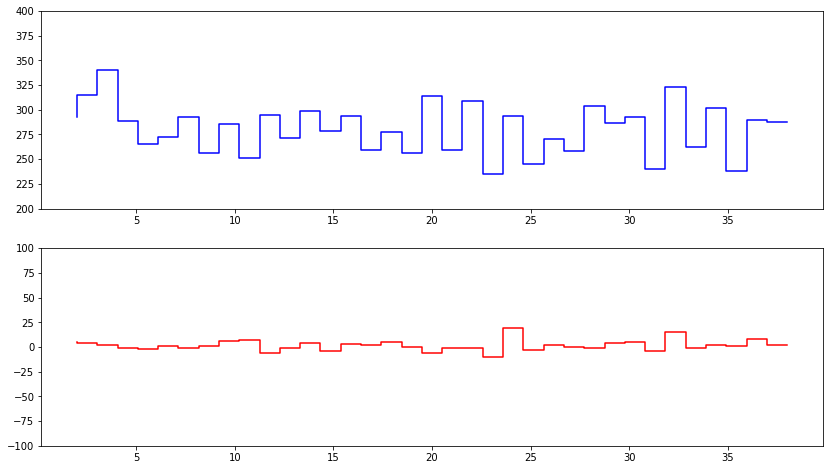

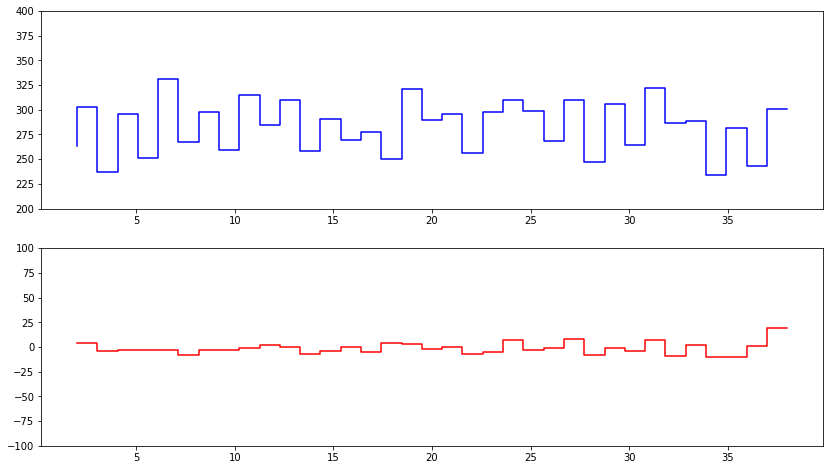

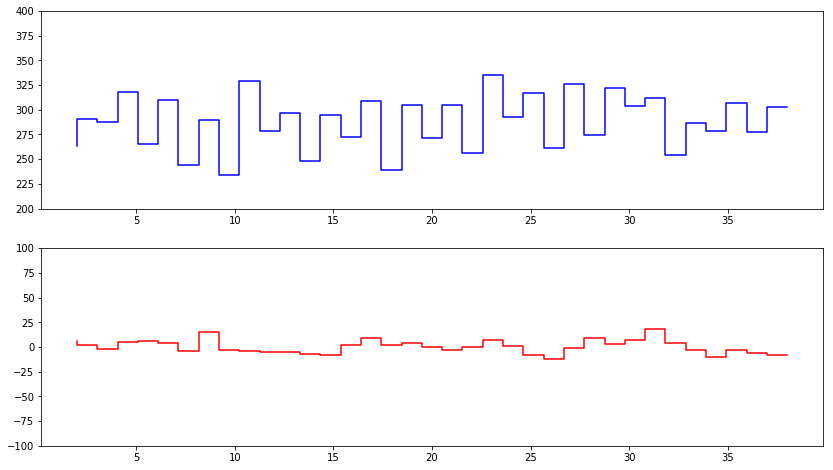

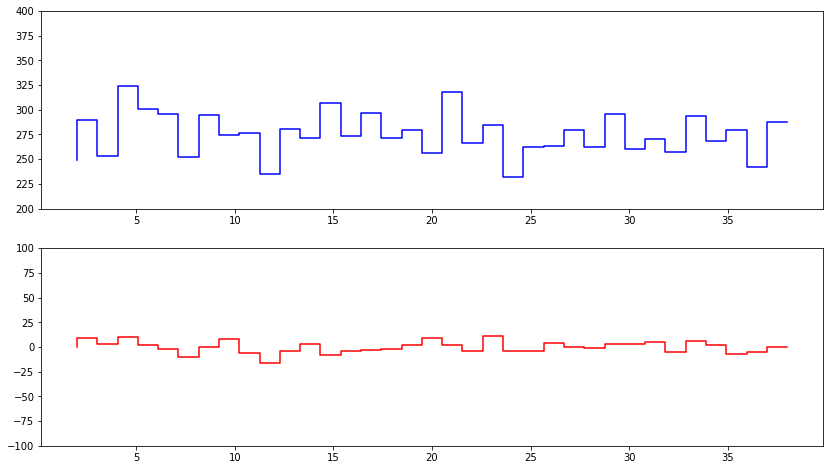

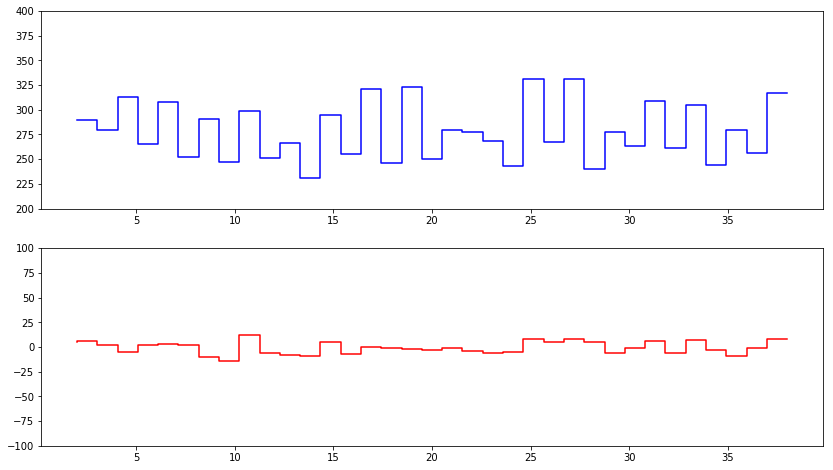

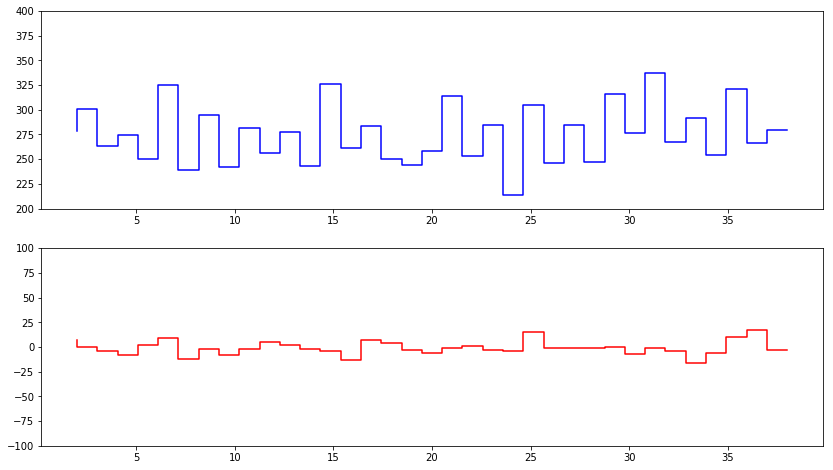

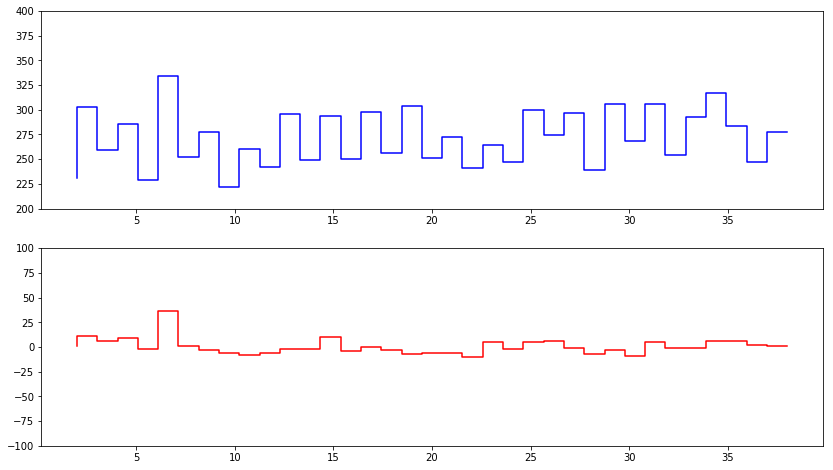

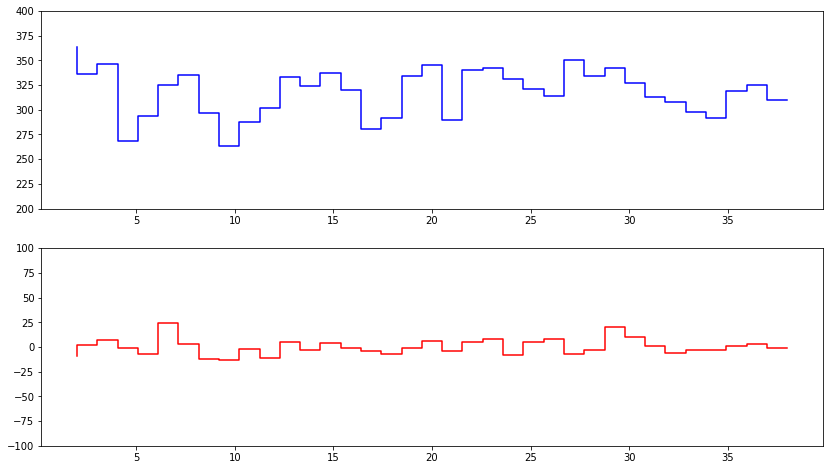

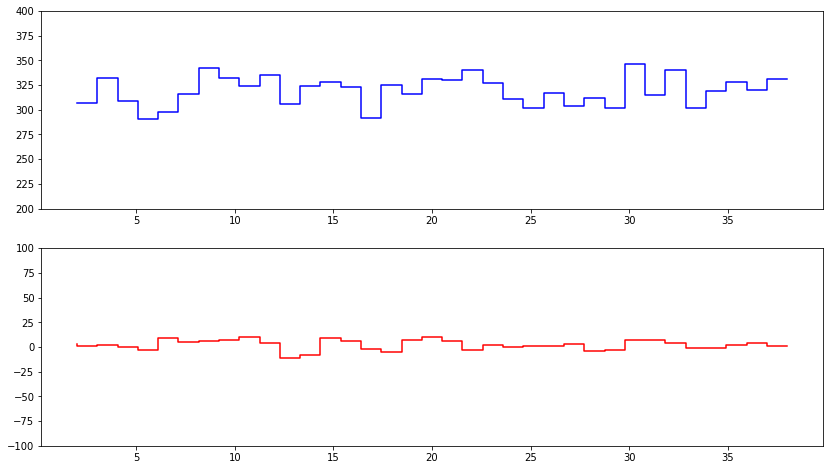

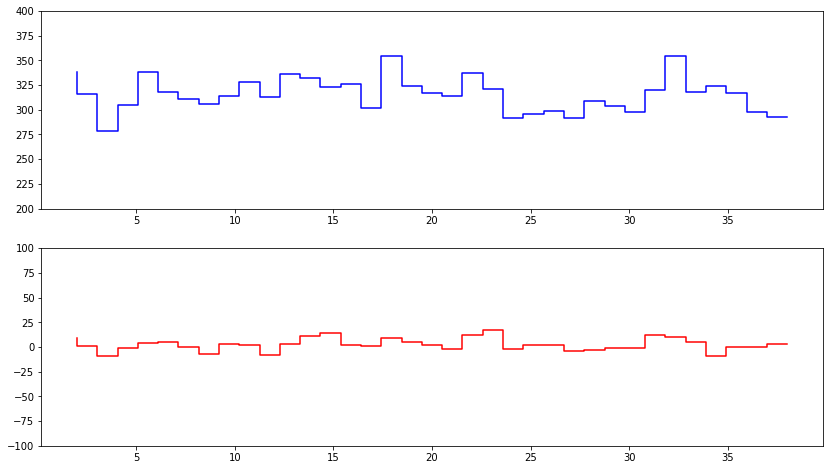

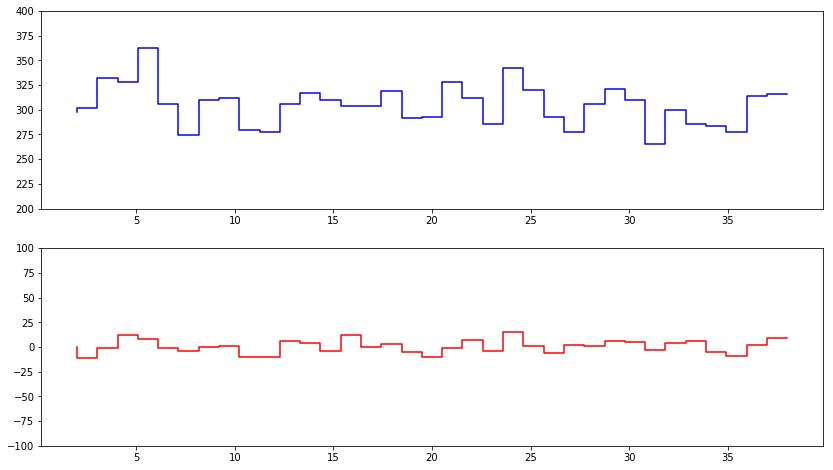

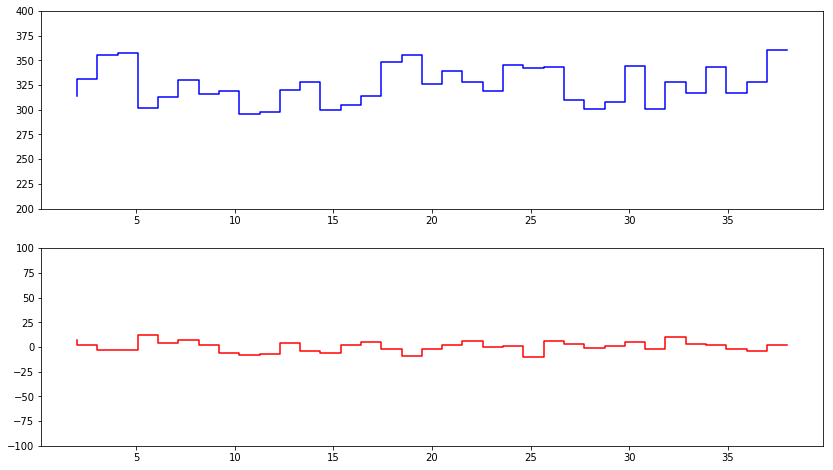

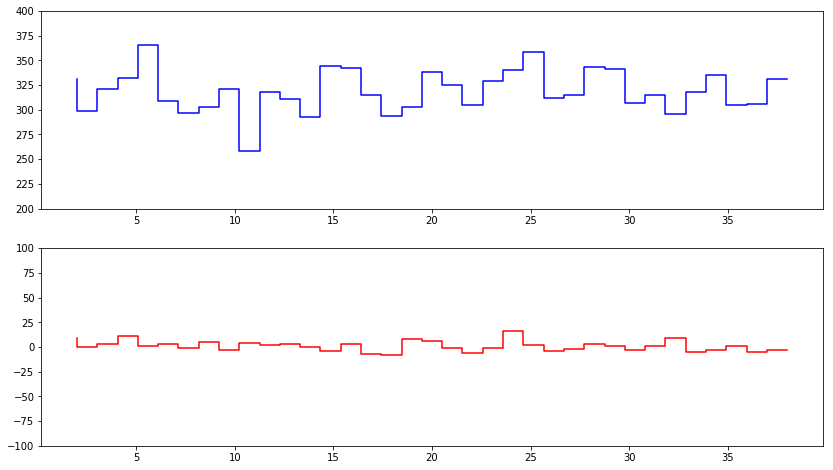

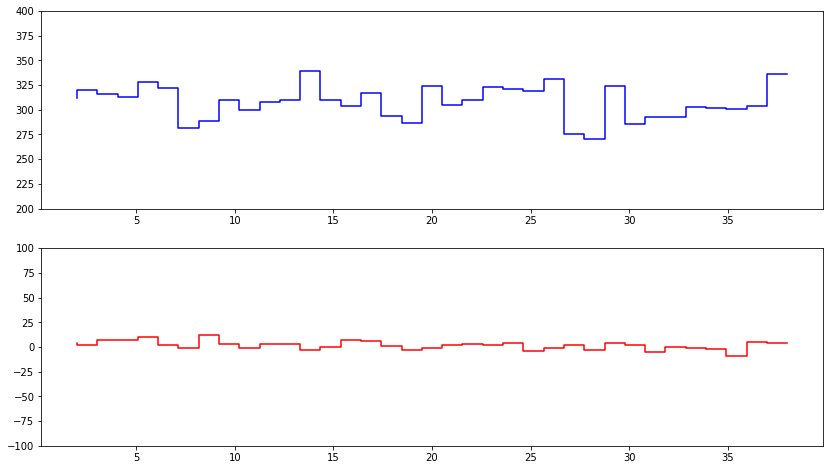

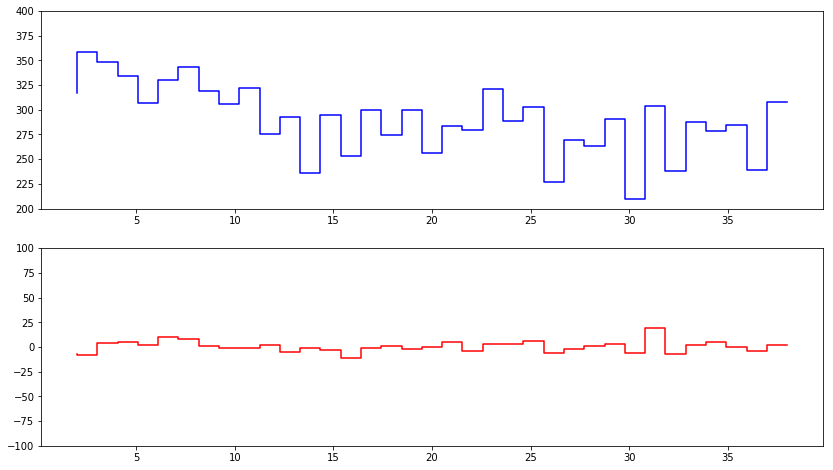

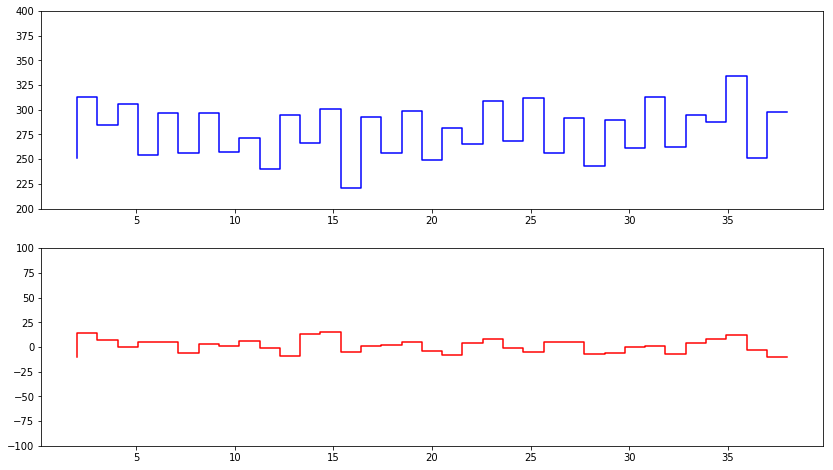

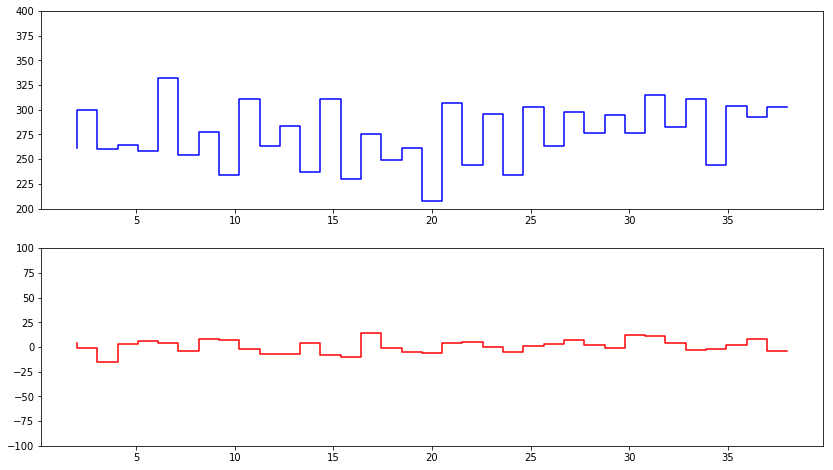

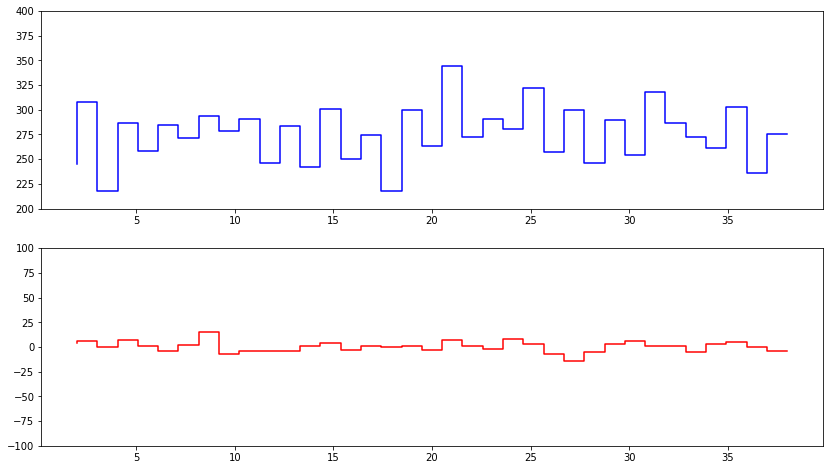

In [46]:
plt.rcParams['figure.figsize'] = (14, 8)

reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)

for i in range(3500, 3555):
    nr = 1
    t = np.linspace(2, 38, 36)
    ev = seeker[i]
    pixel = 0
    fig, ax = plt.subplots(2, 1)
    ax[0].step(t, ev.r0.tel[0].waveform[0, nr * 7:(nr + 1) * 7, 2:38][pixel], color="blue")
    ax[0].set_ylim([200, 400])
    w = remove_pedestal(ev, ped, 1)
    ax[1].step(t, w[0, 0, 2:38], color="red")
    ax[1].set_ylim([-100, 100])
    plt.show()

In [22]:
reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)
ev = seeker[3555]
print(ev.r0.tel[0].waveform[0, nr * 7:(nr + 1) * 7, 5])

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


302


In [43]:
print(ev)

{'count': 3554,
 'dl0': {'event_id': -1, 'obs_id': -1, 'tel': {}, 'tels_with_data': []},
 'dl1': {'tel': {}},
 'dl2': {'classification': {}, 'energy': {}, 'shower': {}},
 'inst': {'subarray': SubarrayDescription(name='MonteCarloArray', num_tels=0)},
 'lst': {'tel': {0: {'evt': {'cdts_data': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
                             'chips_flags': array([0, 0, 0, ..., 0, 0, 0], dtype=uint16),
                             'configuration_id': 1,
                             'counters': array([ 44,   0, 148, ...,   0,   0,   0], dtype=uint8),
                             'drs_tag': array([2172, 2166, 2183, ..., 1941, 1945, 1954], dtype=uint16),
                             'drs_tag_status': array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12